# Práctica Final Aprendizaje Automático

Grupo 5: Jorge Ortega y Daniela Vidal

## Índice

1. [Presentación del dataset](#Presentación-del-dataset)
2. [Preprocesamiento](#Preprocesamiento)
3. [Dataset final](#Dataset-final)
4. [Separación en entrenamiento, validación y test](#Separación-en-entrenamiento,-validación-y-test)
5. [Red logística](#Red-logística)
6. [Red neuronal](#Red-neuronal)
7. [Árboles de decisión](#Árboles-de-decisión)
8. [Comparación de resultados](#Comparación-de-resultados)
9. [Conclusiones](#Conclusiones)
10. [Bibliografía](#Bibliografía) 

## 1. Presentación del dataset <a class="anchor" id="Presentación-del-dataset"></a>

Esta práctica consiste en la aplicación de los conocimientos adquiridos en la asignatura de Aprendizaje Automático a un dataset de imágnes. Lo que se pretende es realizar un clasificador que sea capaz de predecir si una persona tiene alguna enfermedad y cuál a partir de una imagen de su ojo.

El dataset que hemos elegido para realizar la práctica es el de [Ocular Disease Recognition](https://www.kaggle.com/datasets/andrewmvd/ocular-disease-recognition-odir5k). Se trata de un dataset de pacientes con imágenes de sus ojos además de información en cuanto a su edad y su sexo. Contiene 6.392 imágenes de ojos etiquetadas en 8 clases diferentes: 
- Normal (N) - sin ninguna enfermedad
- Diabetes (D) 
- Glaucoma (G)
- Cataratas (C)
- Degeneración muscular debida a la edad (A)
- Hipertensión (H)
- Miopía patológica (M)
- Otras enfermedades (O)

Las imágenes están en formato .jpg y tienen un tamaño de 224x224 píxeles. 

## 2. Preprocesamiento <a class="anchor" id="Preprocesamiento"></a>

### Importación de librerías necesarias

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn as sk
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Constantes globales

In [183]:
IMG_SIZE = 244
RANDOM_STATE = 42

### Lectura del dataset

Podemos ver lo que contiene el dataset con la siguiente tabla:

In [184]:
data = pd.read_csv('full_df.csv')
data.shape

(6392, 19)

In [185]:
data.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


Como ya ha sido mencionado anteriormente, el dataset contiene 5.000 imágenes de ojos etiquetadas en 8 clases diferentes. Además, cada imagen tiene asociada una serie de datos como son la edad, el sexo y el nombre de la imagen, por último el 'target' que es la etiqueta de la imagen y como se puede comprobar corresponde a una única etiqueta.
También se puede comprobar que cuando uno de los dos ojos de un paciente denota alguna enfermedad esta se marca en las columnas ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O'] con un 1, aunque ese ojo no la tenga. Como a nosotros nos interesa ver qué enfermedad muestra cada ojo, estas columnas no serán de utilidad y por tanto serán eliminadas así como la columna 'id'. 
Por otro lado en esta práctica nos interesa ver lo que indica cada ojo, por lo que no necesitamos la información del otro ojo, es decir que no usaremos las columnas de left y right.

In [186]:
data = data.drop(data.columns[3:15], axis=1)
data = data.drop(data.columns[0:1], axis=1)

data.head()

,Patient Age,Patient Sex,filepath,labels,target,filename
0,69,Female,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,57,Male,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,42,Male,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,53,Male,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,50,Female,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


Por otro lado el objetivo de esta práctica es realizar un clasificador *multiclase* es decir, solo vamos a asignar a una de las posibles clases, por esto y para facilitar el código vamos a cambiar la manera de representar la columna target: 

In [187]:
replace_dict = {}
count = 0
for i in range(8):
    vec = [0] * 8
    vec[i] = 1
    replace_dict[str(vec)] = count
    count += 1

replace_dict

{'[1, 0, 0, 0, 0, 0, 0, 0]': 0,
 '[0, 1, 0, 0, 0, 0, 0, 0]': 1,
 '[0, 0, 1, 0, 0, 0, 0, 0]': 2,
 '[0, 0, 0, 1, 0, 0, 0, 0]': 3,
 '[0, 0, 0, 0, 1, 0, 0, 0]': 4,
 '[0, 0, 0, 0, 0, 1, 0, 0]': 5,
 '[0, 0, 0, 0, 0, 0, 1, 0]': 6,
 '[0, 0, 0, 0, 0, 0, 0, 1]': 7}

In [188]:
data.replace(to_replace=replace_dict, inplace=True)
data.head()

,Patient Age,Patient Sex,filepath,labels,target,filename
0,69,Female,../input/ocular-disease-recognition-odir5k/ODI...,['N'],0,0_right.jpg
1,57,Male,../input/ocular-disease-recognition-odir5k/ODI...,['N'],0,1_right.jpg
2,42,Male,../input/ocular-disease-recognition-odir5k/ODI...,['D'],1,2_right.jpg
3,53,Male,../input/ocular-disease-recognition-odir5k/ODI...,['D'],1,4_right.jpg
4,50,Female,../input/ocular-disease-recognition-odir5k/ODI...,['D'],1,5_right.jpg


Representamos cada clase con un número del 0 al 7, de esta manera podemos utilizar el target como un número y no como una cadena de caracteres.

- Normal (N) -> 0
- Diabetes (D) -> 1
- Glaucoma (G) -> 2
- Cataratas (C) -> 3
- Degeneración muscular debida a la edad (A) -> 4
- Hipertensión (H) -> 5
- Miopía patológica (M) -> 6
- Otras enfermedades (O) -> 7

Veamos ahora la distribución de las clases en el dataset:

In [189]:
data['labels'].value_counts()

['N']    2873
['D']    1608
['O']     708
['C']     293
['G']     284
['A']     266
['M']     232
['H']     128
Name: labels, dtype: int64

Podemos ver que hay:
- 2873 imagenes clasificadas como 'Normal'
                    
- 1608 imagenes clasificadas como 'Diabetes'

- 703 imagenes clasificadas como 'Otro'
                    
- 293 imagenes clasificadas como 'Cataratas'

- 284 imagenes clasificadas como 'Glaucoma'
                    
- 266 imagenes clasificadas como 'Degeneración muscular debida a la edad'
                    
- 232 imagenes clasificadas como 'Hipertensión'
                    
- 128 imagenes clasificadas como 'Miopía patológica'

Vemos que hay un desbalanceo de clases, por lo que tendremos que tenerlo en cuenta a la hora de realizar el entrenamiento de los modelos.

Por otro lado vamos a ver las imágenes y la forma de tratarlas:

Modificamos el path de las imágenes para que sea más fácil acceder a ellas.

In [190]:
data['filepath'] = data['filepath'].str.replace('../input/ocular-disease-recognition-odir5k/', 'input/', regex=False)

In [191]:
data.head()

,Patient Age,Patient Sex,filepath,labels,target,filename
0,69,Female,input/ODIR-5K/Training Images/0_right.jpg,['N'],0,0_right.jpg
1,57,Male,input/ODIR-5K/Training Images/1_right.jpg,['N'],0,1_right.jpg
2,42,Male,input/ODIR-5K/Training Images/2_right.jpg,['D'],1,2_right.jpg
3,53,Male,input/ODIR-5K/Training Images/4_right.jpg,['D'],1,4_right.jpg
4,50,Female,input/ODIR-5K/Training Images/5_right.jpg,['D'],1,5_right.jpg


Podemos ver la comparación entre una imagen normal y una con deterioro muscular:

In [192]:
data_normal = data[data['target'] == 0].sample(n=3, random_state=RANDOM_STATE)
data_cat = data[data['target'] == 4].sample(n=3, random_state=RANDOM_STATE)

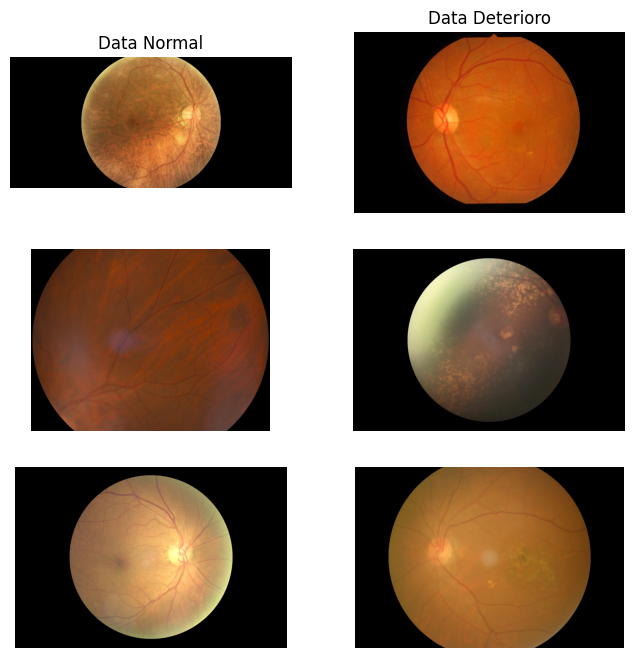

In [193]:
fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(3, 2)

axs = [fig.add_subplot(gs[i, 0]) for i in range(3)] + \
[fig.add_subplot(gs[i, 1]) for i in range(3)]

for i in range(3):
    img0_path = data_normal.iloc[i]["filepath"]
    img1_path = data_cat.iloc[i]["filepath"]    
    img0 = mpimg.imread(img0_path) 
    img1 = mpimg.imread(img1_path) 
    axs[i].imshow(img0)
    axs[i+3].imshow(img1)
    axs[i].axis('off') 
    axs[i+3].axis('off')
    
axs[0].set_title('Data Normal')
axs[3].set_title('Data Deterioro')

plt.show()

Como se puede ver estas imagenes tienen diferencias como el fondo negro, los tamaños, etc. Por lo que usaremos las imagenes que se encuentran en la carpeta 'Preprocessed_images', 
de modo que cambiaremos el filepath por este.

In [194]:
data['filepath'] = data['filepath'].str.replace('input/ODIR-5K/Training Images/', 'input/preprocessed_images/')

## 3. Dataset final <a class="anchor" id="Dataset-final"></a>

In [195]:
data.head()

,Patient Age,Patient Sex,filepath,labels,target,filename
0,69,Female,input/preprocessed_images/0_right.jpg,['N'],0,0_right.jpg
1,57,Male,input/preprocessed_images/1_right.jpg,['N'],0,1_right.jpg
2,42,Male,input/preprocessed_images/2_right.jpg,['D'],1,2_right.jpg
3,53,Male,input/preprocessed_images/4_right.jpg,['D'],1,4_right.jpg
4,50,Female,input/preprocessed_images/5_right.jpg,['D'],1,5_right.jpg


## 4. Separación en entrenamiento, validación y test <a class="anchor" id="Separación-en-entrenamiento,-validación-y-test"></a>

Dividiremos en 60-20-20 para entrenamiento, test y validación.

In [233]:
data_train, data_resto = train_test_split(data, test_size=0.4, random_state=RANDOM_STATE)
data_test, data_val = train_test_split(data_resto, test_size=0.5, random_state=RANDOM_STATE)

In [235]:
print(len(data_train))
print(len(data_test))
print(len(data_val))

3835
1278
1279


Necesitamos relacionar las imagenes con su columna en el dataframe para ello usaremos al función ImageDataGenerator de TensorFlow para cargar y preprocesar las imágenes y la función flow_from_dataframe para relacionarlas con el dataset.

In [236]:
traingen = ImageDataGenerator(rescale=1./255) 
testgen = ImageDataGenerator(rescale=1./255)

In [237]:
batch_size = 32
target_size = (IMG_SIZE, IMG_SIZE)
directory = "input/preprocessed_images/"

train_generator = traingen.flow_from_dataframe(
    dataframe=data_train,
    directory=directory,
    x_col="filename",
    y_col="target",
    subset="training",
    target_size=target_size,
    batch_size=batch_size,
    seed=RANDOM_STATE,
    class_mode="raw",
)

Found 3835 validated image filenames.


In [239]:
val_generator = testgen.flow_from_dataframe(
    dataframe=data_val,
    directory=directory,
    x_col="filename",
    y_col="target",
    target_size=target_size,
    batch_size=batch_size,
    seed=RANDOM_STATE,
    class_mode="raw"
)

Found 1279 validated image filenames.


In [240]:
test_generator = testgen.flow_from_dataframe(
    dataframe=data_test,
    directory=directory,
    x_col="filename",
    y_col="target",
    target_size=target_size,
    batch_size=batch_size,
    seed=RANDOM_STATE,
    class_mode="raw"
)

Found 1278 validated image filenames.
